In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading data
df = pd.read_csv('dataset/austin_waste_and_diversion.csv')

In [3]:
df.head()

,dropoff_site,load_id,load_time,load_type,load_weight,report_date,route_number,route_type
0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27,DW1,RECYCLING - SINGLE STREAM
1,BRAKER SITE,308336,2008-12-16 10:55:00,SWEEPING,NaN,2008-12-16,NW10-R,STREET CLEANING-RESIDENTIAL
2,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06,RHBU20,RECYCLING - SINGLE STREAM
3,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14,DSS04,SWEEPER DUMPSITES
4,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02,YH08,YARD TRIMMINGS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564403 entries, 0 to 564402
Data columns (total 8 columns):
dropoff_site    564403 non-null object
load_id         564403 non-null int64
load_time       564403 non-null object
load_type       564403 non-null object
load_weight     504967 non-null float64
report_date     564403 non-null object
route_number    564403 non-null object
route_type      564403 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 34.4+ MB


In [5]:
df.dropoff_site.unique()

array(['MRF', 'BRAKER SITE', 'TDS - MRF', 'TDS LANDFILL', 'HORNSBY BEND',
       'ONION CREEK', 'BALCONES RECYCLING', 'BURGER CENTER',
       'GREAT NORTHERN', 'STEINER LANDFILL', 'ZILKER', 'ELMONT',
       'ORGANICS BY GOSH', 'WINNEBAGO', 'WILCAB', 'PARK CENTER',
       'CLARKSON', 'PEASE PARK', 'KRAMER', 'PARK BEND', 'BARTON SKYWAY',
       'ON ROUTE HIGH DUMP', 'CROSS PARK', 'WESTFIELD',
       'INSPIRATION/GUNNISAN', 'ST. EDWARDS', 'BFI LANDFILL',
       'COMMERCIAL METALS', 'BALCONES WOODS', 'AUSTIN WOOD RECYCLING',
       'CYCLED PLASTICS LTD', 'LITTER DROPOFF', 'DEEP EDDY PARK'],
      dtype=object)

In [6]:
# removing the report_date
df.drop('report_date', axis=1, inplace=True)

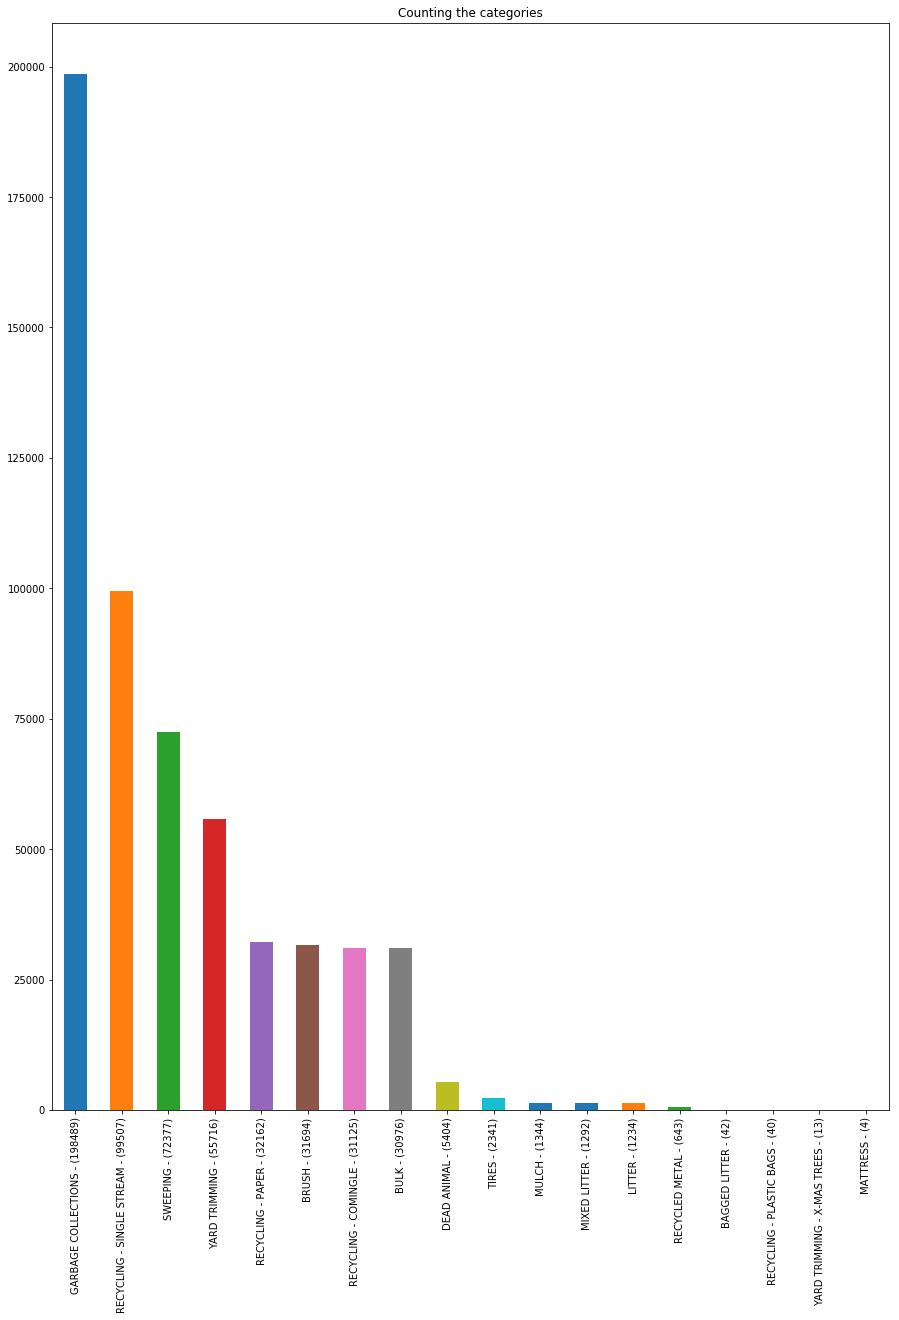

In [18]:
# plotting
plt.figure(figsize=(15, 20))
load_type_counts = df['load_type'].value_counts()
ax1 = load_type_counts.plot(kind='bar');
labels = []
for i, label in enumerate(load_type_counts.index):
    labels.append('{} - ({})'.format(label, load_type_counts[label]))
ax1.set_xticklabels(labels)
plt.title('Counting the categories')
plt.savefig('plots/count_cat.png')

In [8]:
load_by_route_type = df.groupby('load_type')['route_type'].unique()
for i in load_by_route_type.index:
    print('\n{}: '.format(i))
    for j in load_by_route_type[i]:
        print('\t{}'.format(j))


BAGGED LITTER: 
	STORM
	LITTER CONTROL
	BRUSH
	SPECIAL PROJECT LC
	SPECIAL EVENTS
	GARBAGE COLLECTION

BRUSH: 
	BRUSH
	STORM
	SPECIAL PROJECT LC
	CAP STORM
	CAP STORM BR
	HAULING
	SPECIAL PROJECT BR
	SPECIAL PROJECT BU
	OUT OF CYCLE BRUSH
	CAP BRUSH
	BULK
	CAP BULK
	DEAD ANIMAL
	CAP STORM BU
	LITTER CONTROL
	KAB
	SWEEPER DUMPSITES

BULK: 
	BULK
	STORM
	SPECIAL PROJECT BU
	CAP STORM BU
	CAP BULK
	SPECIAL PROJECT LC
	HAULING
	CAP STORM
	CAP BRUSH
	CAP STORM BR
	LITTER P/U
	BRUSH
	LITTER CONTROL
	SPECIAL EVENTS
	SPECIAL PROJECT BR
	KAB
	DEAD ANIMAL
	OUT OF CYCLE BULK

DEAD ANIMAL: 
	DEAD ANIMAL
	CAP BULK
	BULK
	YARD TRIMMINGS

GARBAGE COLLECTIONS: 
	GARBAGE COLLECTION
	SPECIAL EVENTS
	RECYCLING - SINGLE STREAM
	YARD TRIMMINGS
	ALLEY BULK REMOVAL
	DEAD ANIMAL
	KAB
	SPECIAL PROJECT LC
	LITTER CONTROL
	RECYCLING

LITTER: 
	LITTER CONTROL
	KAB
	SWEEPER DUMPSITES
	SPECIAL PROJECT LC
	SPECIAL EVENTS
	LITTER P/U
	STORM
	STREET CLEANING-DOWNTOWN
	STREET CLEANING-BLVD
	DEAD ANIMAL
	BIKE LANE SWEE

In [9]:
# checking missing data
missing = df[df['load_weight'].isnull()]
missing_perc = len(missing) / len(df) * 100
print('Missing Total: {}\n Missing Percentage: {:.2f}%'.format(len(missing), missing_perc))

Missing Total: 59436
 Missing Percentage: 10.53%


In [10]:
missing['load_type'].value_counts()

SWEEPING                     59198
MIXED LITTER                    66
LITTER                          34
RECYCLING - SINGLE STREAM       32
GARBAGE COLLECTIONS             29
TIRES                           25
BRUSH                           19
RECYCLING - COMINGLE             9
YARD TRIMMING                    8
RECYCLING - PAPER                7
DEAD ANIMAL                      6
BULK                             3
Name: load_type, dtype: int64

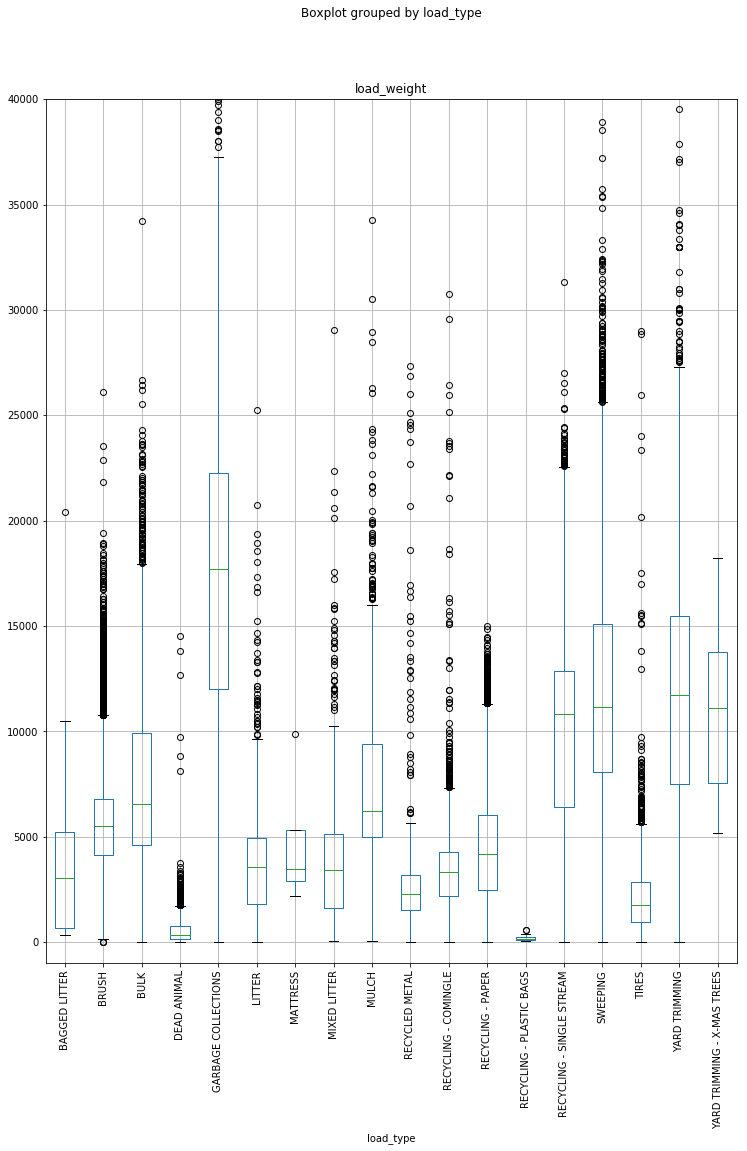

In [21]:
ax3 = df.boxplot(by='load_type', column='load_weight', figsize=(12, 16))
ax3.set_ylim(-1000,40000);
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90);
plt.savefig('plots/Boxplot.png')

In [12]:
df.groupby('load_type')['load_weight'].describe()

,count,mean,std,min,25%,50%,75%,max
load_type,,,,,,,,
BAGGED LITTER,42.0,12937.642857,61542.442188,320.0,680.0,3040.0,5245.0,401561.0
BRUSH,31675.0,5847.707561,2379.966904,0.0,4120.0,5500.0,6780.0,109880.0
BULK,30973.0,7292.024990,4119.581320,0.0,4600.0,6540.0,9940.0,407022.0
DEAD ANIMAL,5398.0,528.006669,625.374468,0.0,140.0,320.0,780.0,14540.0
GARBAGE COLLECTIONS,198460.0,17005.311121,7909.059725,0.0,12000.0,17720.0,22280.0,1562821.0
LITTER,1200.0,3795.658333,2746.845621,20.0,1800.0,3580.0,4940.0,25260.0
MATTRESS,4.0,4745.000000,3484.111556,2200.0,2890.0,3450.0,5305.0,9880.0
MIXED LITTER,1226.0,4110.199837,8923.636252,60.0,1620.0,3420.0,5120.0,224397.0
MULCH,1344.0,7969.176339,4940.805691,40.0,5000.0,6220.0,9420.0,46740.0


In [13]:
# looking the data as timeseries
data_ts = df.sort_values('load_time')
data_ts.index = data_ts['load_time']
data_ts = data_ts.drop('load_time', axis=1)
data_ts.head()

,dropoff_site,load_id,load_type,load_weight,route_number,route_type
load_time,,,,,,
2000-01-26 12:39:00,MRF,163262,RECYCLING - PAPER,2940.0,RH12,RECYCLING
2001-03-16 09:38:00,TDS LANDFILL,522335,BULK,4240.0,BU05,BULK
2001-03-16 13:33:00,TDS LANDFILL,522334,BULK,4740.0,BU05,BULK
2001-10-16 11:51:00,TDS LANDFILL,545997,BULK,14080.0,BU16,BULK
2001-10-16 15:28:00,TDS LANDFILL,545996,BULK,8260.0,BU16,BULK
